In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from scipy.stats import spearmanr
import pandas as pd
import requests
from bs4 import BeautifulSoup
import dcor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [2]:
tables=pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
sp500_wiki=tables[0]
sp500_wiki=sp500_wiki.iloc[:,:3]
print(sp500_wiki.shape)
sp500_wiki.head()

(503, 3)


,Symbol,Security,GICS Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ACN,Accenture,Information Technology


In [3]:
tickers=sp500_wiki['Symbol'].unique().tolist()
tickers[:10]

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [4]:
tickers = [t.replace('BF.B', 'BF-B').replace('BRK.B', 'BRK-B') for t in tickers]

In [5]:
start_date="2018-01-01"
end_date="2024-12-31"
df = yf.download(tickers  ,start=start_date, end=end_date)
df= df['Close'].reset_index()
print(df.shape)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  503 of 503 completed


(1760, 504)


Ticker,Date,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
0,2018-01-02,64.044167,40.479839,71.013641,NaN,51.537842,27.988113,137.391556,177.699997,78.786263,...,132.792114,26.511978,151.444550,38.329437,60.593204,62.401215,71.530029,113.763313,103.709999,67.852104
1,2018-01-03,65.673691,40.472797,72.124931,NaN,51.651798,28.013470,138.025635,181.039993,79.763664,...,135.276459,26.744799,149.803864,38.072899,61.783253,63.162094,71.468697,114.551933,105.769997,68.164055
2,2018-01-04,65.181053,40.660778,71.713600,NaN,51.564117,28.118069,139.659958,183.220001,79.676392,...,136.649612,26.527004,150.615005,37.776268,61.868774,63.583797,72.196266,114.386871,107.860001,68.570595
3,2018-01-05,66.223206,41.123711,72.961983,NaN,51.713161,28.007132,140.811996,185.339996,79.999298,...,137.525940,26.489447,151.619736,37.511692,61.818893,63.464642,72.617035,115.523941,109.540001,69.355278
4,2018-01-08,66.365303,40.970966,71.792976,NaN,51.564117,28.010302,141.937271,185.039993,80.138924,...,136.785172,26.662188,149.601089,37.792294,62.096813,63.693825,72.739761,115.744026,110.629997,70.187263


In [6]:
df_low=df.isna().sum().reset_index()
df_low=df_low[df_low[0]>0]
df_low.head()

,Ticker,0
4,ABNB,741
76,CARR,556
85,CEG,1019
113,CRWD,362
120,CTVA,350


In [7]:
df_low['Ticker'].unique()

array(['ABNB', 'CARR', 'CEG', 'CRWD', 'CTVA', 'DASH', 'DAY', 'DOW', 'EXE',
       'FOX', 'FOXA', 'GEHC', 'GEV', 'KVUE', 'MRNA', 'OTIS', 'PLTR',
       'SOLV', 'SW', 'UBER', 'VLTO'], dtype=object)

In [8]:
df = df.drop(columns=df_low['Ticker'].unique())
print(df.shape)
df.head()

(1760, 483)


Ticker,Date,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
0,2018-01-02,64.044167,40.479839,71.013641,51.537842,27.988113,137.391556,177.699997,78.786263,32.515381,...,132.792114,26.511978,151.444550,38.329437,60.593204,62.401215,71.530029,113.763313,103.709999,67.852104
1,2018-01-03,65.673691,40.472797,72.124931,51.651798,28.013470,138.025635,181.039993,79.763664,32.263947,...,135.276459,26.744799,149.803864,38.072899,61.783253,63.162094,71.468697,114.551933,105.769997,68.164055
2,2018-01-04,65.181053,40.660778,71.713600,51.564117,28.118069,139.659958,183.220001,79.676392,32.807346,...,136.649612,26.527004,150.615005,37.776268,61.868774,63.583797,72.196266,114.386871,107.860001,68.570595
3,2018-01-05,66.223206,41.123711,72.961983,51.713161,28.007132,140.811996,185.339996,79.999298,32.588364,...,137.525940,26.489447,151.619736,37.511692,61.818893,63.464642,72.617035,115.523941,109.540001,69.355278
4,2018-01-08,66.365303,40.970966,71.792976,51.564117,28.010302,141.937271,185.039993,80.138924,32.515381,...,136.785172,26.662188,149.601089,37.792294,62.096813,63.693825,72.739761,115.744026,110.629997,70.187263


In [9]:
sp500 = yf.download('^GSPC', start=start_date, end=end_date)
sp500= sp500['Close'].reset_index()
df=df.merge(sp500, how='inner')
print(df.shape)
df.head()

[*********************100%***********************]  1 of 1 completed

(1760, 484)


Ticker,Date,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS,^GSPC
0,2018-01-02,64.044167,40.479839,71.013641,51.537842,27.988113,137.391556,177.699997,78.786263,32.515381,...,26.511978,151.444550,38.329437,60.593204,62.401215,71.530029,113.763313,103.709999,67.852104,2695.810059
1,2018-01-03,65.673691,40.472797,72.124931,51.651798,28.013470,138.025635,181.039993,79.763664,32.263947,...,26.744799,149.803864,38.072899,61.783253,63.162094,71.468697,114.551933,105.769997,68.164055,2713.060059
2,2018-01-04,65.181053,40.660778,71.713600,51.564117,28.118069,139.659958,183.220001,79.676392,32.807346,...,26.527004,150.615005,37.776268,61.868774,63.583797,72.196266,114.386871,107.860001,68.570595,2723.989990
3,2018-01-05,66.223206,41.123711,72.961983,51.713161,28.007132,140.811996,185.339996,79.999298,32.588364,...,26.489447,151.619736,37.511692,61.818893,63.464642,72.617035,115.523941,109.540001,69.355278,2743.149902
4,2018-01-08,66.365303,40.970966,71.792976,51.564117,28.010302,141.937271,185.039993,80.138924,32.515381,...,26.662188,149.601089,37.792294,62.096813,63.693825,72.739761,115.744026,110.629997,70.187263,2747.709961


In [10]:
df.drop(columns=['Date'],axis=1,inplace=True)
df_returns = np.log(df / df.shift(1))

df_returns = df_returns.dropna()

df_returns.reset_index(inplace=True)

print(df_returns.shape)
df_returns.head()

(1759, 484)


Ticker,index,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS,^GSPC
0,1,0.025125,-0.000174,0.015528,0.002209,0.000906,0.004605,0.018621,0.012329,-0.007763,...,0.008743,-0.010893,-0.006715,0.019450,0.012120,-0.000858,0.006908,0.019668,0.004587,0.006378
1,2,-0.007530,0.004634,-0.005719,-0.001699,0.003727,0.011771,0.011970,-0.001095,0.016702,...,-0.008177,0.005400,-0.007822,0.001383,0.006654,0.010129,-0.001442,0.019567,0.005946,0.004021
2,3,0.015862,0.011321,0.017258,0.002886,-0.003953,0.008215,0.011504,0.004045,-0.006697,...,-0.001417,0.006649,-0.007028,-0.000807,-0.001876,0.005811,0.009891,0.015456,0.011378,0.007009
3,4,0.002143,-0.003721,-0.016152,-0.002886,0.000113,0.007960,-0.001620,0.001744,-0.002242,...,0.006500,-0.013403,0.007453,0.004486,0.003605,0.001689,0.001903,0.009901,0.011925,0.001661
4,5,0.024257,-0.000115,0.007510,0.001699,-0.012984,0.003330,0.008931,-0.002071,0.003237,...,-0.006783,0.006755,-0.011736,-0.004255,0.000288,-0.002655,-0.016214,0.030183,0.011650,0.001302


In [11]:

def compute_risk_measures(returns_series,index_returns,THRESHOLD_Q,Q_LEVEL):
    cum_ret = returns_series.cumsum()
    drawdowns = cum_ret.expanding().max() - cum_ret

    edor = np.mean(np.maximum(drawdowns - THRESHOLD_Q, 0))

    cdar = np.mean(np.sort(drawdowns)[-int(Q_LEVEL * len(drawdowns)):])
    
    cvar_threshold = np.quantile(returns_series, 1-Q_LEVEL)
    cvar = -returns_series[returns_series <= cvar_threshold].mean()

    lpm1 = np.mean(np.maximum(0 - returns_series, 0))
    lpm2 = np.mean(np.maximum(0 - returns_series, 0) ** 2)
    lpm3 = np.mean(np.maximum(0 - returns_series, 0) ** 3)
    lpm4 = np.mean(np.maximum(0 - returns_series, 0) ** 4)

    max_drawdown = drawdowns.max()
    var = np.quantile(returns_series, 1-Q_LEVEL)
    volatility = returns_series.std() * np.sqrt(252)

    mask = index_returns < 0
    index_down = index_returns[mask]
    stock_down = returns_series[mask]
    combined = pd.concat([stock_down, index_down], axis=1).dropna()
    cov = np.cov(combined.iloc[:, 0], combined.iloc[:, 1])[0, 1]
    varr = np.var(combined.iloc[:, 1])
    downside_beta=cov / varr

    return [edor, cdar, cvar, lpm1, lpm2, lpm3, lpm4, max_drawdown, var ,volatility, downside_beta ]


In [12]:
stocks=list(df_returns.columns)
stocks.remove('^GSPC')
stocks.remove('index')

THRESHOLD_Q = 0.2  
Q_LEVEL = 0.1  
risk_matrix = pd.DataFrame(
    {ticker: compute_risk_measures(df_returns[ticker],df_returns['^GSPC'],THRESHOLD_Q,Q_LEVEL) for ticker in stocks}  
).T

risk_matrix.columns = ["EDoR", "CDaR", "CVaR", "LPM1", "LPM2", "LPM3", "LPM4", "Max Drawdown","VaR","Volatility","Downside Beta"]
print(risk_matrix.shape)
risk_matrix.head()

(482, 11)


,EDoR,CDaR,CVaR,LPM1,LPM2,LPM3,LPM4,Max Drawdown,VaR,Volatility,Downside Beta
A,0.042306,0.418839,0.002980,0.006256,0.000169,0.000008,5.018720e-07,0.557478,0.020112,0.286745,0.878897
AAPL,0.010724,0.302217,0.002667,0.006264,0.000180,0.000009,6.165268e-07,0.486391,0.021392,0.305595,1.149382
ABBV,0.041015,0.451449,0.002534,0.005420,0.000164,0.000012,1.354291e-06,0.599470,0.017137,0.271161,0.748567
ABT,0.020925,0.326556,0.002552,0.005265,0.000122,0.000005,2.869934e-07,0.413650,0.016480,0.248102,0.751189
ACGL,0.036305,0.500120,0.002854,0.005992,0.000194,0.000013,1.478222e-06,0.773052,0.018897,0.304541,1.110156


In [13]:
rank_df = risk_matrix.rank()
print(rank_df.shape)
rank_df.head()

(482, 11)


,EDoR,CDaR,CVaR,LPM1,LPM2,LPM3,LPM4,Max Drawdown,VaR,Volatility,Downside Beta
A,241.0,207.0,166.0,216.0,165.0,99.0,85.0,143.0,237.0,162.0,155.0
AAPL,93.0,97.0,97.0,218.0,199.0,136.0,105.0,91.0,287.0,220.0,327.0
ABBV,236.0,240.0,67.0,95.0,147.0,224.0,253.0,178.0,112.0,112.0,81.0
ABT,145.0,125.0,74.0,78.0,38.0,32.0,19.0,44.0,81.0,49.0,82.0
ACGL,217.0,277.0,139.0,178.0,225.0,254.0,272.0,296.0,190.0,218.0,303.0


In [14]:
corr_spearman = rank_df.corr(method='spearman')
corr_spearman

,EDoR,CDaR,CVaR,LPM1,LPM2,LPM3,LPM4,Max Drawdown,VaR,Volatility,Downside Beta
EDoR,1.000000,0.982617,0.830026,0.752728,0.738908,0.689893,0.635949,0.858283,0.664638,0.716205,0.432178
CDaR,0.982617,1.000000,0.847750,0.776370,0.778451,0.734999,0.680118,0.903354,0.689114,0.755843,0.482140
CVaR,0.830026,0.847750,1.000000,0.953986,0.933143,0.849408,0.766282,0.855914,0.885247,0.930592,0.663215
LPM1,0.752728,0.776370,0.953986,1.000000,0.962468,0.847094,0.747014,0.795515,0.976366,0.975238,0.715927
LPM2,0.738908,0.778451,0.933143,0.962468,1.000000,0.952019,0.879826,0.843592,0.922309,0.990021,0.762162
LPM3,0.689893,0.734999,0.849408,0.847094,0.952019,1.000000,0.980360,0.837052,0.789099,0.917592,0.747470
LPM4,0.635949,0.680118,0.766282,0.747014,0.879826,0.980360,1.000000,0.795258,0.682210,0.834431,0.710617
Max Drawdown,0.858283,0.903354,0.855914,0.795515,0.843592,0.837052,0.795258,1.000000,0.715529,0.818094,0.638585
VaR,0.664638,0.689114,0.885247,0.976366,0.922309,0.789099,0.682210,0.715529,1.000000,0.949789,0.713566
Volatility,0.716205,0.755843,0.930592,0.975238,0.990021,0.917592,0.834431,0.818094,0.949789,1.000000,0.768344


In [15]:
corr_kendall = rank_df.corr(method='kendall')
corr_kendall

,EDoR,CDaR,CVaR,LPM1,LPM2,LPM3,LPM4,Max Drawdown,VaR,Volatility,Downside Beta
EDoR,1.000000,0.894187,0.638098,0.562599,0.549072,0.503748,0.455905,0.672104,0.482009,0.528558,0.302956
CDaR,0.894187,1.000000,0.657819,0.586218,0.590393,0.546519,0.495846,0.734992,0.503041,0.566843,0.340240
CVaR,0.638098,0.657819,1.000000,0.817841,0.776399,0.659544,0.568396,0.671587,0.706507,0.773001,0.484597
LPM1,0.562599,0.586218,0.817841,1.000000,0.842513,0.661821,0.552040,0.607543,0.870377,0.869791,0.530077
LPM2,0.549072,0.590393,0.776399,0.842513,1.000000,0.812407,0.696034,0.663788,0.770171,0.920411,0.581491
LPM3,0.503748,0.546519,0.659544,0.661821,0.812407,1.000000,0.880384,0.655731,0.601418,0.754833,0.576332
LPM4,0.455905,0.495846,0.568396,0.552040,0.696034,0.880384,1.000000,0.606991,0.496398,0.642670,0.535011
Max Drawdown,0.672104,0.734992,0.671587,0.607543,0.663788,0.655731,0.606991,1.000000,0.530232,0.633578,0.473365
VaR,0.482009,0.503041,0.706507,0.870377,0.770171,0.601418,0.496398,0.530232,1.000000,0.817220,0.527023
Volatility,0.528558,0.566843,0.773001,0.869791,0.920411,0.754833,0.642670,0.633578,0.817220,1.000000,0.584821


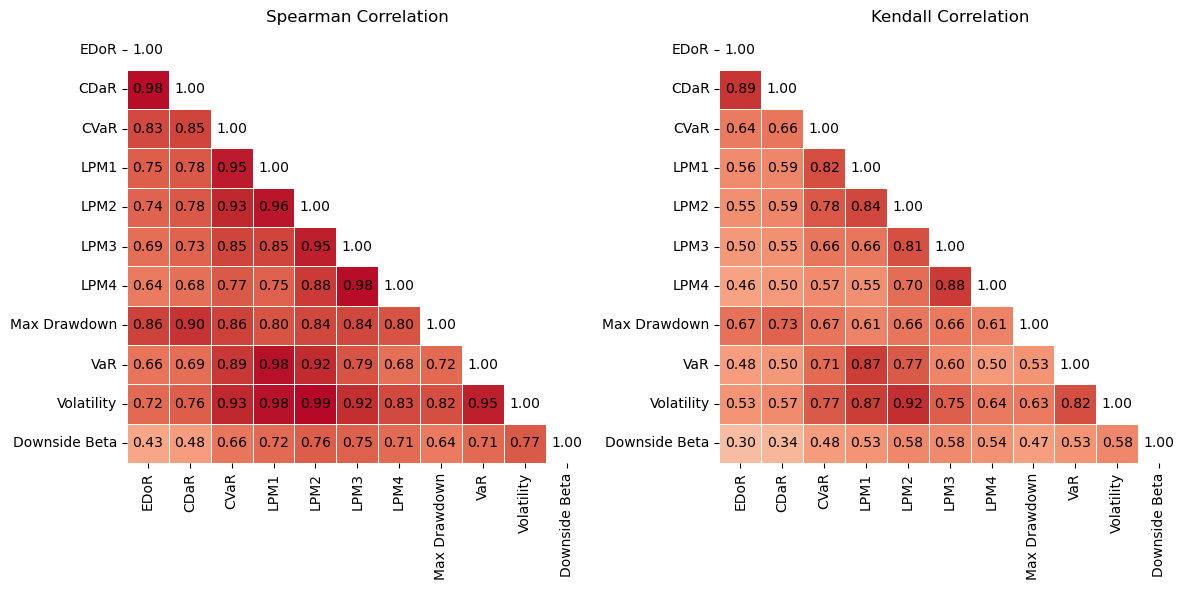

In [16]:
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(corr_spearman, mask=mask, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, vmin=-1, vmax=1, ax=ax[0], cbar=False)
sns.heatmap(corr_kendall, mask=mask, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, vmin=-1, vmax=1, ax=ax[1], cbar=False)

n = corr_spearman.shape[0]
for i in range(n):
    for j in range(n):
        if i >= j: 
            ax[0].text(j + 0.5, i + 0.5, f"{corr_spearman.iloc[i, j]:.2f}",
                       ha='center', va='center', color='black', fontsize=10, clip_on=True)
            ax[1].text(j + 0.5, i + 0.5, f"{corr_kendall.iloc[i, j]:.2f}",
                       ha='center', va='center', color='black', fontsize=10, clip_on=True)

ax[0].set_title('Spearman Correlation')
ax[1].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()

# 1. Measure Sensitivity: How do the rankings change if we adjust the parameters (e.g., Q LEVEL for CVaR/CDaR from 0.1 to 0.05, or THRESHOLD Q for ERoD from 0.2 to 0.3)? Does this affect the correlation structure?

In [17]:
stocks=list(df_returns.columns)
stocks.remove('^GSPC')
stocks.remove('index')

THRESHOLD_Q = 0.2  
Q_LEVEL = 0.1  
risk_matrix = pd.DataFrame(
    {ticker: compute_risk_measures(df_returns[ticker],df_returns['^GSPC'],THRESHOLD_Q,Q_LEVEL) for ticker in stocks}  
).T

risk_matrix.columns = ["EDoR", "CDaR", "CVaR", "LPM1", "LPM2", "LPM3", "LPM4", "Max Drawdown","VaR","Volatility","Downside Beta"]

rank_df1 = risk_matrix.rank()
corr_spearman1 = rank_df1.corr(method='spearman')
corr_kendall1 = rank_df1.corr(method='kendall')
print(rank_df1.shape)
rank_df1.head()

(482, 11)


,EDoR,CDaR,CVaR,LPM1,LPM2,LPM3,LPM4,Max Drawdown,VaR,Volatility,Downside Beta
A,241.0,207.0,166.0,216.0,165.0,99.0,85.0,143.0,237.0,162.0,155.0
AAPL,93.0,97.0,97.0,218.0,199.0,136.0,105.0,91.0,287.0,220.0,327.0
ABBV,236.0,240.0,67.0,95.0,147.0,224.0,253.0,178.0,112.0,112.0,81.0
ABT,145.0,125.0,74.0,78.0,38.0,32.0,19.0,44.0,81.0,49.0,82.0
ACGL,217.0,277.0,139.0,178.0,225.0,254.0,272.0,296.0,190.0,218.0,303.0


In [18]:
stocks=list(df_returns.columns)
stocks.remove('^GSPC')
stocks.remove('index')

THRESHOLD_Q = 0.3  
Q_LEVEL = 0.05
risk_matrix = pd.DataFrame(
    {ticker: compute_risk_measures(df_returns[ticker],df_returns['^GSPC'],THRESHOLD_Q,Q_LEVEL) for ticker in stocks}  
).T

risk_matrix.columns = ["EDoR", "CDaR", "CVaR", "LPM1", "LPM2", "LPM3", "LPM4", "Max Drawdown","VaR","Volatility","Downside Beta"]

rank_df2 = risk_matrix.rank()
corr_spearman2 = rank_df2.corr(method='spearman')
corr_kendall2= rank_df2.corr(method='kendall')

print(rank_df2.shape)
rank_df2.head()

(482, 11)


,EDoR,CDaR,CVaR,LPM1,LPM2,LPM3,LPM4,Max Drawdown,VaR,Volatility,Downside Beta
A,212.0,192.0,156.0,216.0,165.0,99.0,85.0,143.0,198.0,162.0,155.0
AAPL,100.0,102.0,30.0,218.0,199.0,136.0,105.0,91.0,263.0,220.0,327.0
ABBV,237.0,248.0,62.0,95.0,147.0,224.0,253.0,178.0,98.0,112.0,81.0
ABT,113.0,111.0,80.0,78.0,38.0,32.0,19.0,44.0,66.0,49.0,82.0
ACGL,255.0,286.0,127.0,178.0,225.0,254.0,272.0,296.0,209.0,218.0,303.0


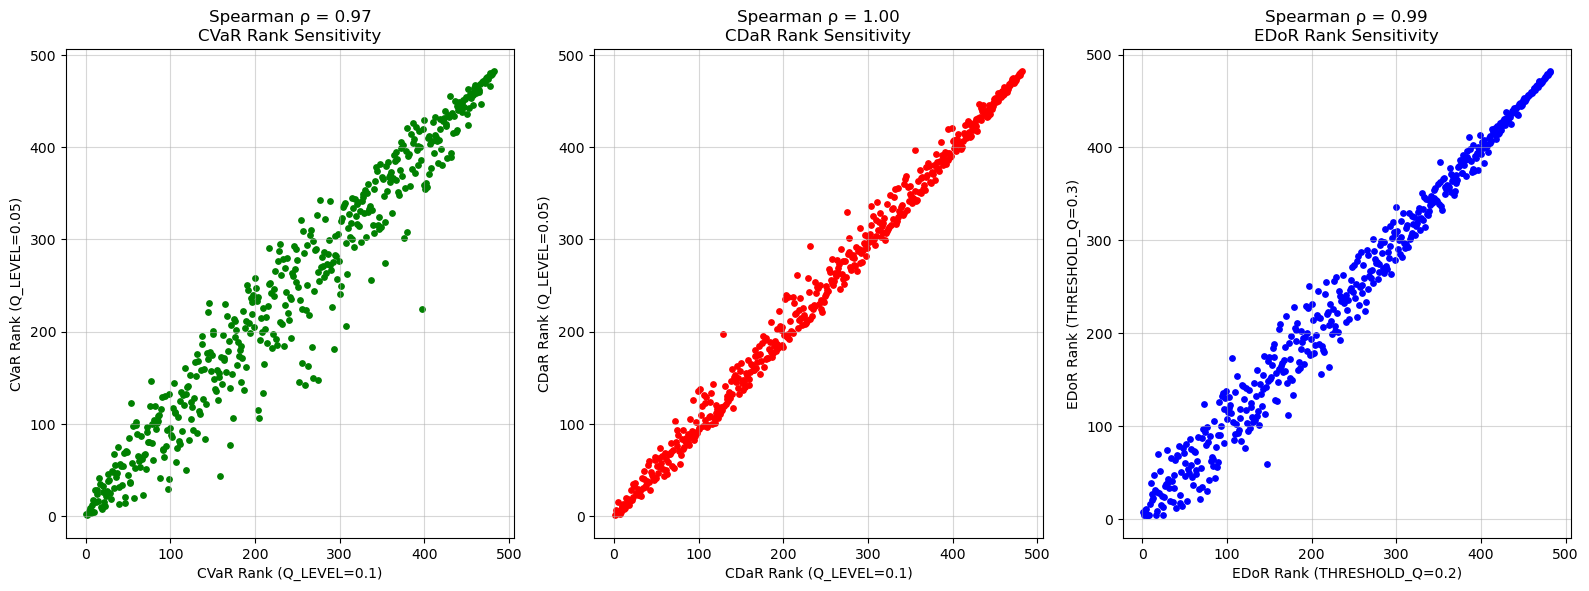

In [19]:
cvar_corr, _ = spearmanr(rank_df1['CVaR'], rank_df2['CVaR'])
cdar_corr, _ = spearmanr(rank_df1['CDaR'], rank_df2['CDaR'])
edorr_corr, _ = spearmanr(rank_df1['EDoR'], rank_df2['EDoR'])

fig, ax = plt.subplots(1, 3, figsize=(16, 6))

ax[0].scatter(rank_df1['CVaR'], rank_df2['CVaR'], color='green', s=15)
ax[0].set_xlabel("CVaR Rank (Q_LEVEL=0.1)")
ax[0].set_ylabel("CVaR Rank (Q_LEVEL=0.05)")
ax[0].set_title("CVaR Rank Sensitivity")
ax[0].text(0.5, 1.05, f"Spearman ρ = {cvar_corr:.2f}", ha='center', va='bottom', transform=ax[0].transAxes, fontsize=12)
ax[0].grid(True, alpha=0.5)

ax[1].scatter(rank_df1['CDaR'], rank_df2['CDaR'], color='red', s=15)
ax[1].set_xlabel("CDaR Rank (Q_LEVEL=0.1)")
ax[1].set_ylabel("CDaR Rank (Q_LEVEL=0.05)")
ax[1].set_title("CDaR Rank Sensitivity")
ax[1].text(0.5, 1.05, f"Spearman ρ = {cdar_corr:.2f}", ha='center', va='bottom', transform=ax[1].transAxes, fontsize=12)
ax[1].grid(True, alpha=0.5)

ax[2].scatter(rank_df1['EDoR'], rank_df2['EDoR'], color='blue', s=15)
ax[2].set_xlabel("EDoR Rank (THRESHOLD_Q=0.2)")
ax[2].set_ylabel("EDoR Rank (THRESHOLD_Q=0.3)")
ax[2].set_title("EDoR Rank Sensitivity")
ax[2].text(0.5, 1.05, f"Spearman ρ = {edorr_corr:.2f}", ha='center', va='bottom', transform=ax[2].transAxes, fontsize=12)
ax[2].grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

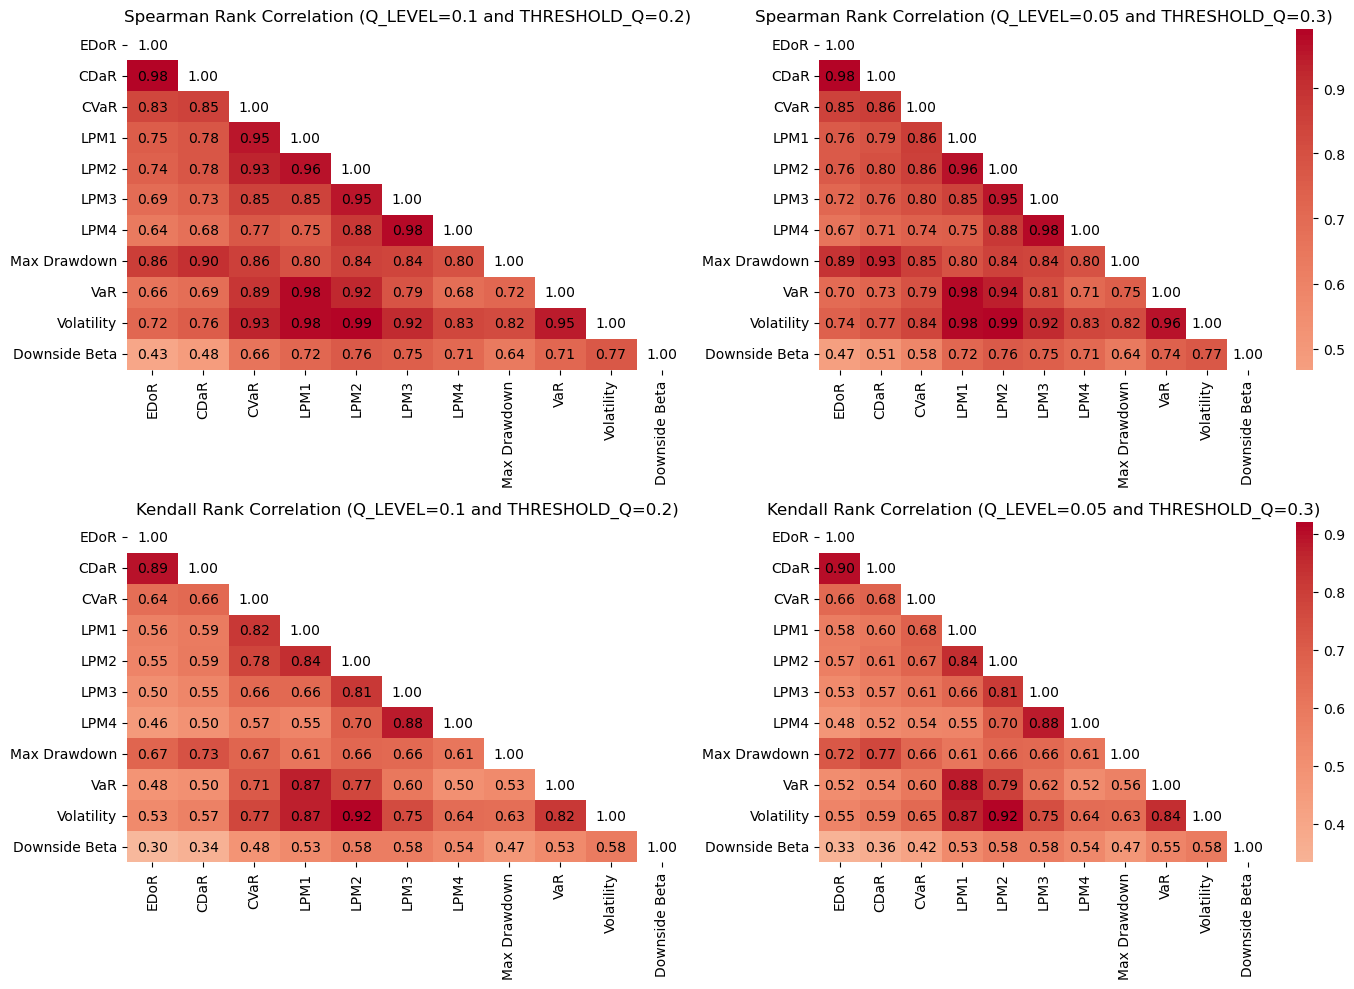

In [20]:
mask1 = np.triu(np.ones_like(corr_spearman1, dtype=bool))
mask2 = np.triu(np.ones_like(corr_spearman2, dtype=bool))
mask3 = np.triu(np.ones_like(corr_kendall1, dtype=bool))
mask4 = np.triu(np.ones_like(corr_kendall2, dtype=bool))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.heatmap(corr_spearman1, ax=axes[0, 0], cmap='coolwarm', center=0, cbar=False, mask=mask1, fmt='.2f')
axes[0, 0].set_title('Spearman Rank Correlation (Q_LEVEL=0.1 and THRESHOLD_Q=0.2)')

sns.heatmap(corr_spearman2, ax=axes[0, 1], cmap='coolwarm', center=0, mask=mask2, fmt='.2f')
axes[0, 1].set_title('Spearman Rank Correlation (Q_LEVEL=0.05 and THRESHOLD_Q=0.3)')

sns.heatmap(corr_kendall1, ax=axes[1, 0], cmap='coolwarm', center=0, cbar=False, mask=mask3, fmt='.2f')
axes[1, 0].set_title('Kendall Rank Correlation (Q_LEVEL=0.1 and THRESHOLD_Q=0.2)')

sns.heatmap(corr_kendall2, ax=axes[1, 1], cmap='coolwarm', center=0, mask=mask4, fmt='.2f')
axes[1, 1].set_title('Kendall Rank Correlation (Q_LEVEL=0.05 and THRESHOLD_Q=0.3)')

n1, n2, n3, n4 = corr_spearman1.shape[0], corr_spearman2.shape[0], corr_kendall1.shape[0], corr_kendall2.shape[0]

for i in range(n1):
    for j in range(n1):
        if i >= j:  
            axes[0, 0].text(j + 0.5, i + 0.5, f"{corr_spearman1.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=10, clip_on=True)

for i in range(n2):
    for j in range(n2):
        if i >= j:  
            axes[0, 1].text(j + 0.5, i + 0.5, f"{corr_spearman2.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=10, clip_on=True)

for i in range(n3):
    for j in range(n3):
        if i >= j:  
            axes[1, 0].text(j + 0.5, i + 0.5, f"{corr_kendall1.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=10, clip_on=True)

for i in range(n4):
    for j in range(n4):
        if i >= j:  
            axes[1, 1].text(j + 0.5, i + 0.5, f"{corr_kendall2.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=10, clip_on=True)

plt.tight_layout()
plt.show()

# 2. Sector Effects: Do risk measure correlations differ across S&P 500 sectors (e.g., tech vs. utilities)? Could sector-specific risk profiles explain divergence between drawdown and tail measures?

In [21]:
rank_df1=rank_df.reset_index()
print(rank_df1.shape)
rank_df1.head()

(482, 12)


,index,EDoR,CDaR,CVaR,LPM1,LPM2,LPM3,LPM4,Max Drawdown,VaR,Volatility,Downside Beta
0,A,241.0,207.0,166.0,216.0,165.0,99.0,85.0,143.0,237.0,162.0,155.0
1,AAPL,93.0,97.0,97.0,218.0,199.0,136.0,105.0,91.0,287.0,220.0,327.0
2,ABBV,236.0,240.0,67.0,95.0,147.0,224.0,253.0,178.0,112.0,112.0,81.0
3,ABT,145.0,125.0,74.0,78.0,38.0,32.0,19.0,44.0,81.0,49.0,82.0
4,ACGL,217.0,277.0,139.0,178.0,225.0,254.0,272.0,296.0,190.0,218.0,303.0


In [22]:
sp500_wiki.head()

,Symbol,Security,GICS Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ACN,Accenture,Information Technology


In [23]:
sp500_wiki['Symbol'] = sp500_wiki['Symbol'].replace({'BF.B': 'BF-B', 'BRK.B': 'BRK-B'})
rank_df_sector=sp500_wiki.merge(rank_df1,how='inner',right_on='index',left_on='Symbol')
print(rank_df_sector.shape)
rank_df_sector.head()

(482, 15)


,Symbol,Security,GICS Sector,index,EDoR,CDaR,CVaR,LPM1,LPM2,LPM3,LPM4,Max Drawdown,VaR,Volatility,Downside Beta
0,MMM,3M,Industrials,MMM,435.0,411.0,254.0,164.0,134.0,121.0,119.0,354.0,120.0,139.0,107.0
1,AOS,A. O. Smith,Industrials,AOS,299.0,259.0,271.0,239.0,151.0,66.0,31.0,202.0,264.0,174.0,48.0
2,ABT,Abbott Laboratories,Health Care,ABT,145.0,125.0,74.0,78.0,38.0,32.0,19.0,44.0,81.0,49.0,82.0
3,ABBV,AbbVie,Health Care,ABBV,236.0,240.0,67.0,95.0,147.0,224.0,253.0,178.0,112.0,112.0,81.0
4,ACN,Accenture,Information Technology,ACN,228.0,198.0,118.0,119.0,94.0,56.0,33.0,101.0,107.0,111.0,241.0


In [24]:
rank_df_sector.columns

Index(['Symbol', 'Security', 'GICS Sector', 'index', 'EDoR', 'CDaR', 'CVaR',
       'LPM1', 'LPM2', 'LPM3', 'LPM4', 'Max Drawdown', 'VaR', 'Volatility',
       'Downside Beta'],
      dtype='object')

In [25]:
risk_metrics = ['EDoR', 'CDaR', 'CVaR', 'LPM1', 'LPM2', 'LPM3', 
                'LPM4', 'Max Drawdown', 'VaR', 'Volatility', 'Downside Beta']

sector_risk_summary = rank_df_sector.groupby('GICS Sector')[risk_metrics].median()
sector_risk_summary

,EDoR,CDaR,CVaR,LPM1,LPM2,LPM3,LPM4,Max Drawdown,VaR,Volatility,Downside Beta
GICS Sector,,,,,,,,,,,
Communication Services,328.0,299.0,301.0,267.0,261.0,248.0,235.0,274.0,288.0,252.0,225.0
Consumer Discretionary,321.0,328.0,347.0,336.0,361.0,342.0,336.0,325.0,364.0,361.0,347.0
Consumer Staples,178.0,173.0,129.0,91.0,89.0,105.0,132.0,113.0,68.0,71.0,62.0
Energy,405.5,431.0,422.5,428.5,432.5,429.5,425.0,443.5,428.0,431.0,415.0
Financials,221.0,235.0,244.0,246.0,256.0,260.0,245.0,245.0,224.0,261.0,317.0
Health Care,232.0,221.0,225.0,222.0,204.0,183.0,192.0,180.0,212.0,207.0,132.0
Industrials,154.0,150.5,191.5,190.0,180.5,170.0,161.5,170.5,212.0,194.0,234.0
Information Technology,263.0,251.0,300.0,350.0,349.0,309.0,307.0,246.0,361.0,343.0,332.0
Materials,283.0,310.0,332.0,270.0,251.0,238.0,231.0,319.0,261.0,264.0,212.0


In [26]:
corr_spearman = sector_risk_summary.rank().corr(method='spearman')
corr_spearman

,EDoR,CDaR,CVaR,LPM1,LPM2,LPM3,LPM4,Max Drawdown,VaR,Volatility,Downside Beta
EDoR,1.000000,0.963636,0.900000,0.818182,0.827273,0.772727,0.772727,0.954545,0.806380,0.745455,0.572727
CDaR,0.963636,1.000000,0.936364,0.854545,0.845455,0.827273,0.827273,0.990909,0.829159,0.818182,0.645455
CVaR,0.900000,0.936364,1.000000,0.945455,0.936364,0.900000,0.900000,0.945455,0.947611,0.945455,0.772727
LPM1,0.818182,0.854545,0.945455,1.000000,0.963636,0.936364,0.936364,0.863636,0.965834,0.972727,0.827273
LPM2,0.827273,0.845455,0.936364,0.963636,1.000000,0.972727,0.972727,0.854545,0.974946,0.954545,0.872727
LPM3,0.772727,0.827273,0.900000,0.936364,0.972727,1.000000,1.000000,0.845455,0.933943,0.936364,0.909091
LPM4,0.772727,0.827273,0.900000,0.936364,0.972727,1.000000,1.000000,0.845455,0.933943,0.936364,0.909091
Max Drawdown,0.954545,0.990909,0.945455,0.863636,0.854545,0.845455,0.845455,1.000000,0.851938,0.836364,0.700000
VaR,0.806380,0.829159,0.947611,0.965834,0.974946,0.933943,0.933943,0.851938,1.000000,0.970390,0.892941
Volatility,0.745455,0.818182,0.945455,0.972727,0.954545,0.936364,0.936364,0.836364,0.970390,1.000000,0.881818


In [27]:
corr_kendall = sector_risk_summary.rank().corr(method='kendall')
corr_kendall

,EDoR,CDaR,CVaR,LPM1,LPM2,LPM3,LPM4,Max Drawdown,VaR,Volatility,Downside Beta
EDoR,1.000000,0.890909,0.745455,0.636364,0.672727,0.636364,0.636364,0.854545,0.660578,0.600000,0.490909
CDaR,0.890909,1.000000,0.854545,0.745455,0.709091,0.672727,0.672727,0.963636,0.697277,0.709091,0.527273
CVaR,0.745455,0.854545,1.000000,0.890909,0.854545,0.745455,0.745455,0.890909,0.844072,0.854545,0.600000
LPM1,0.636364,0.745455,0.890909,1.000000,0.890909,0.781818,0.781818,0.781818,0.880771,0.890909,0.636364
LPM2,0.672727,0.709091,0.854545,0.890909,1.000000,0.890909,0.890909,0.745455,0.917470,0.854545,0.745455
LPM3,0.636364,0.672727,0.745455,0.781818,0.890909,1.000000,1.000000,0.709091,0.807373,0.818182,0.854545
LPM4,0.636364,0.672727,0.745455,0.781818,0.890909,1.000000,1.000000,0.709091,0.807373,0.818182,0.854545
Max Drawdown,0.854545,0.963636,0.890909,0.781818,0.745455,0.709091,0.709091,1.000000,0.733976,0.745455,0.563636
VaR,0.660578,0.697277,0.844072,0.880771,0.917470,0.807373,0.807373,0.733976,1.000000,0.917470,0.770675
Volatility,0.600000,0.709091,0.854545,0.890909,0.854545,0.818182,0.818182,0.745455,0.917470,1.000000,0.745455


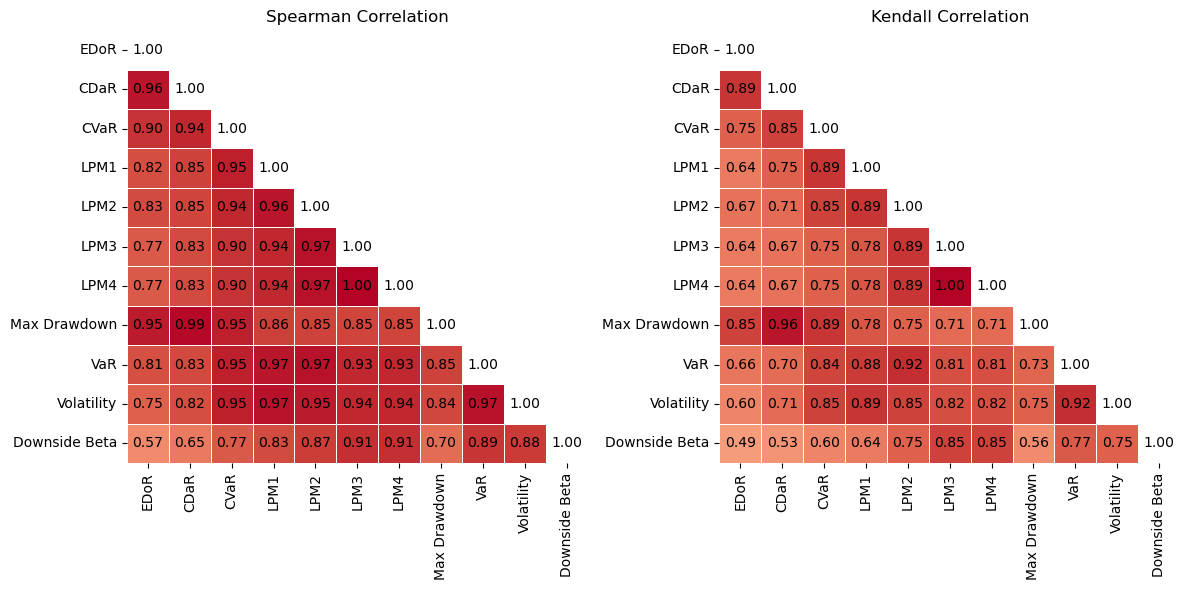

In [28]:
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(corr_spearman, mask=mask, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, vmin=-1, vmax=1, ax=ax[0], cbar=False)
sns.heatmap(corr_kendall, mask=mask, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, vmin=-1, vmax=1, ax=ax[1], cbar=False)

n = corr_spearman.shape[0]
for i in range(n):
    for j in range(n):
        if i >= j: 
            ax[0].text(j + 0.5, i + 0.5, f"{corr_spearman.iloc[i, j]:.2f}",
                       ha='center', va='center', color='black', fontsize=10, clip_on=True)
            ax[1].text(j + 0.5, i + 0.5, f"{corr_kendall.iloc[i, j]:.2f}",
                       ha='center', va='center', color='black', fontsize=10, clip_on=True)

ax[0].set_title('Spearman Correlation')
ax[1].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()

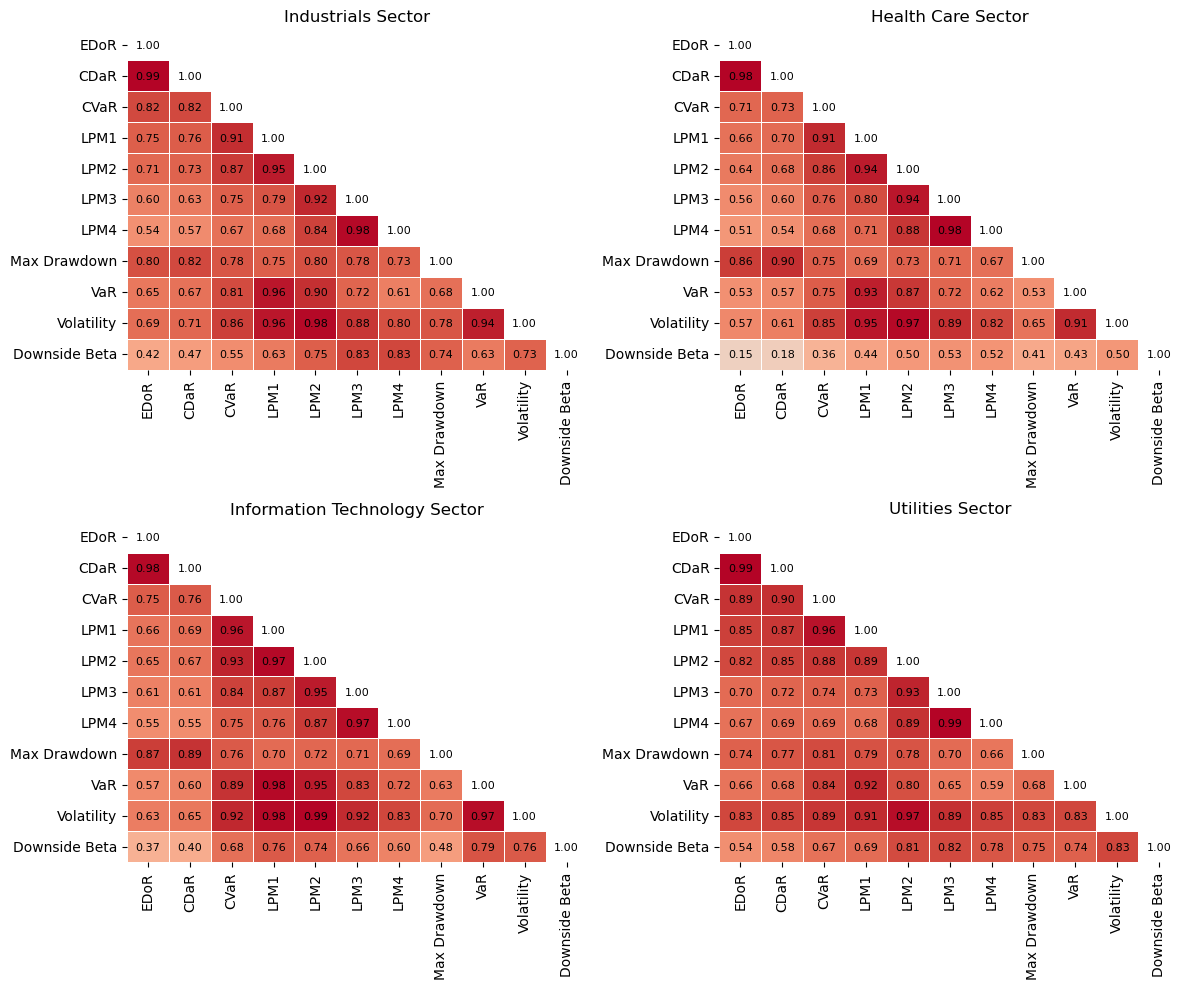

In [29]:
numeric_cols = ['EDoR', 'CDaR', 'CVaR', 'LPM1', 'LPM2', 'LPM3', 'LPM4', 
                'Max Drawdown', 'VaR', 'Volatility', 'Downside Beta']

sectors = ['Industrials', 'Health Care', 'Information Technology','Utilities']
n_cols = 2
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
axes = axes.flatten()

for i, sector in enumerate(sectors):
    sector_df = rank_df_sector[rank_df_sector['GICS Sector'] == sector]

    if len(sector_df) < 2:
        axes[i].set_visible(False)
        continue

    corr = sector_df[numeric_cols].corr(method='spearman')
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0,
                linewidths=0.5, ax=axes[i], cbar=False, annot=False)

    for r in range(len(corr)):
        for c in range(len(corr.columns)):
            if r >= c:
                axes[i].text(c + 0.5, r + 0.5, f"{corr.iloc[r, c]:.2f}",
                             ha='center', va='center', color='black', fontsize=8)

    axes[i].set_title(f"{sector} Sector")

for j in range(len(sectors), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


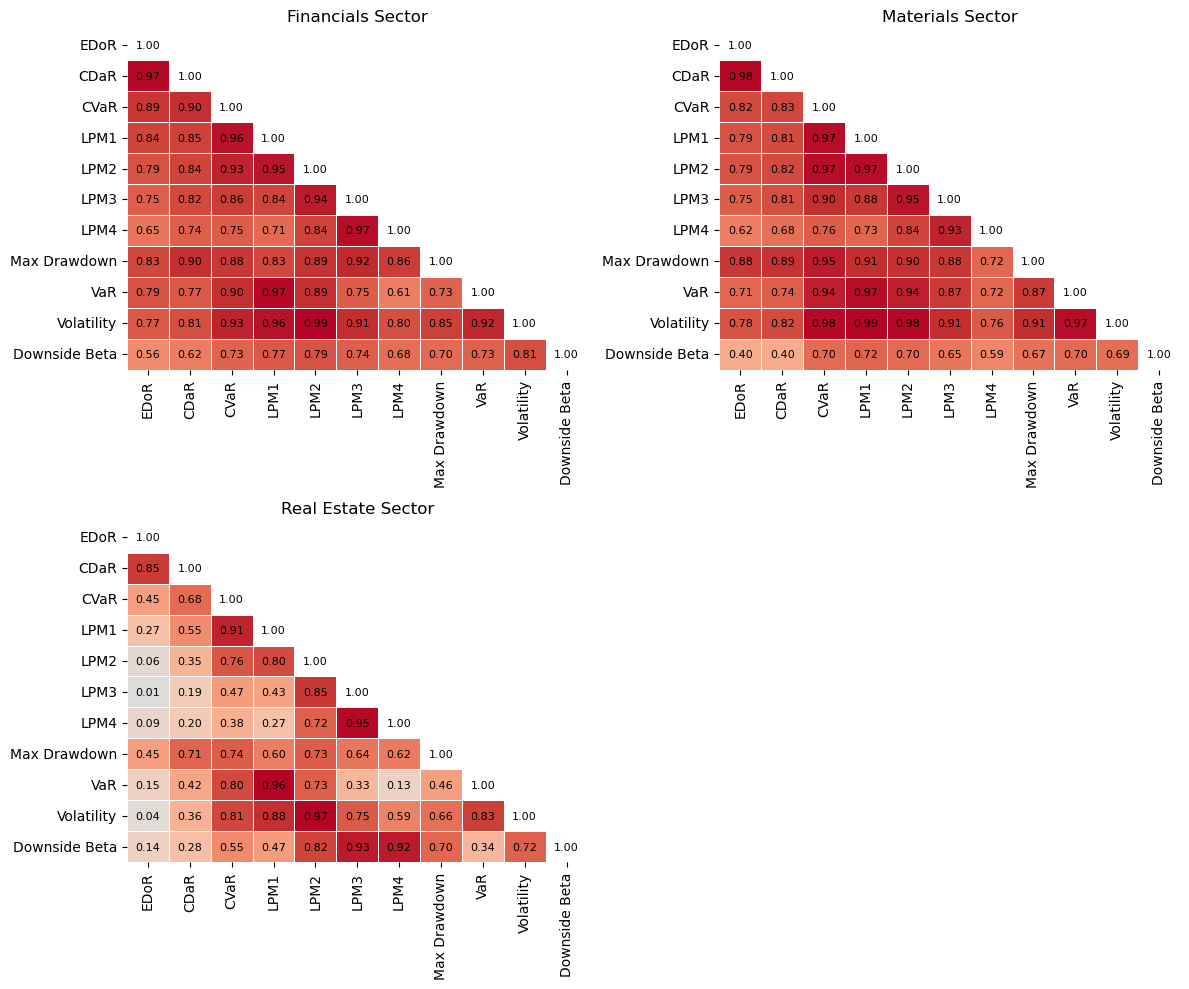

In [30]:
numeric_cols = ['EDoR', 'CDaR', 'CVaR', 'LPM1', 'LPM2', 'LPM3', 'LPM4', 
                'Max Drawdown', 'VaR', 'Volatility', 'Downside Beta']

sectors = ['Financials', 'Materials', 'Real Estate','Communication' ]
n_cols = 2
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
axes = axes.flatten()

for i, sector in enumerate(sectors):
    sector_df = rank_df_sector[rank_df_sector['GICS Sector'] == sector]

    if len(sector_df) < 2:
        axes[i].set_visible(False)
        continue

    corr = sector_df[numeric_cols].corr(method='spearman')
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0,
                linewidths=0.5, ax=axes[i], cbar=False, annot=False)

    for r in range(len(corr)):
        for c in range(len(corr.columns)):
            if r >= c:
                axes[i].text(c + 0.5, r + 0.5, f"{corr.iloc[r, c]:.2f}",
                             ha='center', va='center', color='black', fontsize=8)

    axes[i].set_title(f"{sector} Sector")

for j in range(len(sectors), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


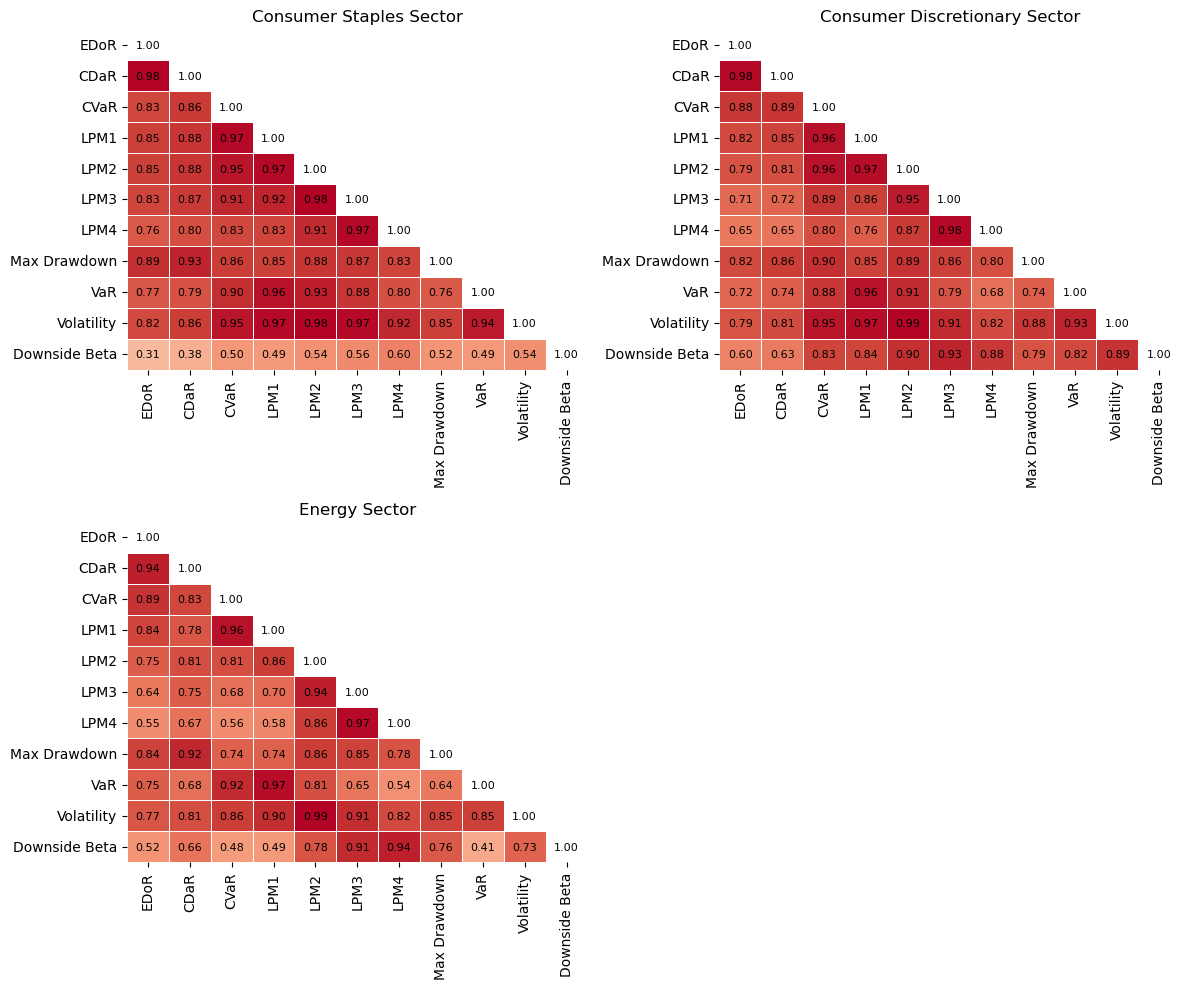

In [31]:
numeric_cols = ['EDoR', 'CDaR', 'CVaR', 'LPM1', 'LPM2', 'LPM3', 'LPM4', 
                'Max Drawdown', 'VaR', 'Volatility', 'Downside Beta']

sectors = ['Consumer Staples','Consumer Discretionary', 'Energy']
n_cols = 2
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
axes = axes.flatten()

for i, sector in enumerate(sectors):
    sector_df = rank_df_sector[rank_df_sector['GICS Sector'] == sector]

    if len(sector_df) < 2:
        axes[i].set_visible(False)
        continue

    corr = sector_df[numeric_cols].corr(method='spearman')
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0,
                linewidths=0.5, ax=axes[i], cbar=False, annot=False)

    for r in range(len(corr)):
        for c in range(len(corr.columns)):
            if r >= c:
                axes[i].text(c + 0.5, r + 0.5, f"{corr.iloc[r, c]:.2f}",
                             ha='center', va='center', color='black', fontsize=8)

    axes[i].set_title(f"{sector} Sector")

for j in range(len(sectors), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()
